In [1]:
from manim import *
import jupyter_capture_output
from numpy import linalg as npl

video_scene = " -v WARNING --disable_caching brown_pot_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s brown_pot_Scene"

Manim Community v0.18.0.post0

Jupyter Capture Output v0.0.11


In [6]:
# potential function
def V(x, y):
    return -1 / np.sqrt(x**2 + y**2 + 1)


# Langevin differential equation of Brownian motion in potential: takes state of the system and returns its derivative array
def langevin_brown_DEQ(state, params):
    # system state
    x = state[0]
    y = state[1]
    v_x = state[2]
    v_y = state[3]
    # force calculation
    sigma = params[0]
    angle = np.random.uniform(0, 2*np.pi)
    delta = 10e-4
    a_x = - (V(x+delta, y) - V(x-delta, y)) / (2*delta) + sigma*np.cos(angle)
    a_y = - (V(x, y+delta) - V(x, y-delta)) / (2*delta) + sigma*np.sin(angle)
    # derivative array calculation
    d_state = np.zeros_like(state)
    d_state[0] = v_x
    d_state[1] = v_y
    d_state[2] = a_x
    d_state[3] = a_y
    return d_state


# verlet integrator
def verlet_step(state, delta_t, params):
    N = int(len(state) / 2)
    # calculation support a1
    a1 = langevin_brown_DEQ(state)
    # using a1: recalculation first half of state array
    for i in range(N):
        state[i] += a1[i] * delta_t + a1[N+i] * delta_t**2/2
    # calculation support a2
    a2 = langevin_brown_DEQ(state)
    # using a2: recalculation second half of state array
    for i in range(N):
        state[N+i] += (a1[N+i] + a2[N+1]) * delta_t/2
    return state

Output saved by creating file at animations/brownian_motion/Brownian_Motion_Potential.mp4.


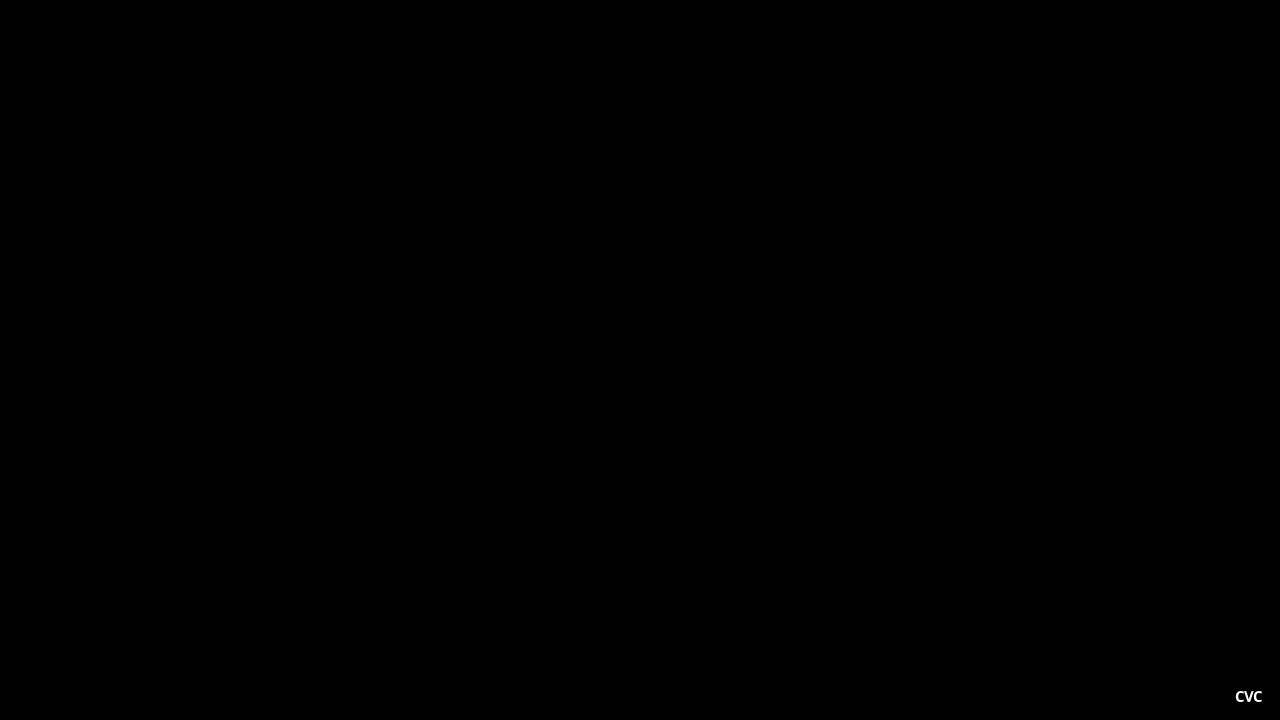

In [4]:
%%capture_video --path "animations/brownian_motion/Brownian_Motion_Potential.mp4"
%%manim -qm --fps 60 $video_scene

class brown_pot_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)